In [55]:
#import library pendukung
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [57]:
#define semesta
tinggi = ctrl.Antecedent(np.arange(100, 201, 1), 'tinggi')
berat = ctrl.Antecedent(np.arange(40, 161, 1), 'berat')
hasil = ctrl.Consequent(np.arange(0, 6, 1), 'hasil')

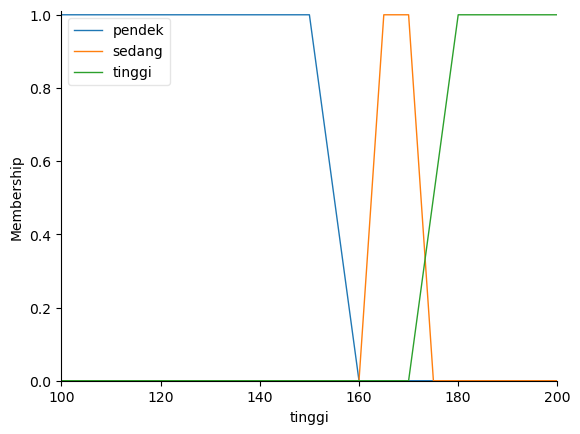

In [61]:
tinggi['pendek'] = fuzz.trapmf(tinggi.universe, [100, 100, 150, 160])
tinggi['sedang'] = fuzz.trapmf(tinggi.universe, [160, 165, 170, 175])
tinggi['tinggi'] = fuzz.trapmf(tinggi.universe, [170, 180, 200, 200])

tinggi.view()

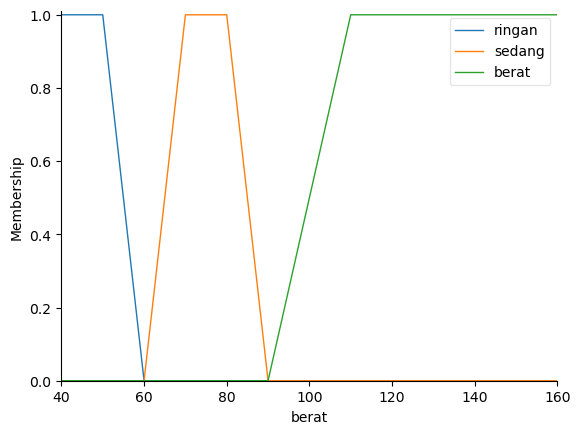

In [65]:
berat['ringan'] = fuzz.trapmf(berat.universe, [40, 40, 50, 60])
berat['sedang'] = fuzz.trapmf(berat.universe, [60, 70, 80, 90])
berat['berat'] = fuzz.trapmf(berat.universe, [90, 110, 160, 160])

berat.view()

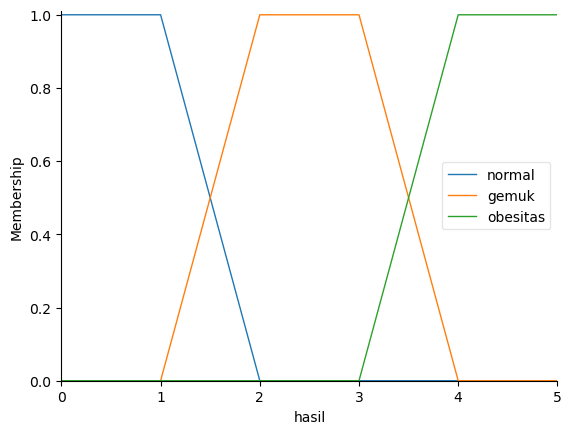

In [71]:
hasil['normal'] = fuzz.trapmf(hasil.universe, [0, 0, 1, 2])
hasil['gemuk'] = fuzz.trapmf(hasil.universe, [1, 2, 3, 4])
hasil['obesitas'] = fuzz.trapmf(hasil.universe, [3, 4, 5, 5])

hasil.view()

In [73]:
rule1 = ctrl.Rule(tinggi['pendek'] & berat['berat'], hasil['obesitas'])

hasil_ctrl = ctrl.ControlSystem([rule1])
hasil_simulation = ctrl.ControlSystemSimulation(hasil_ctrl)


Masukkan tinggi:  150
Masukkan berat:  130


Hasil perhitungan: Kelebihan Berat


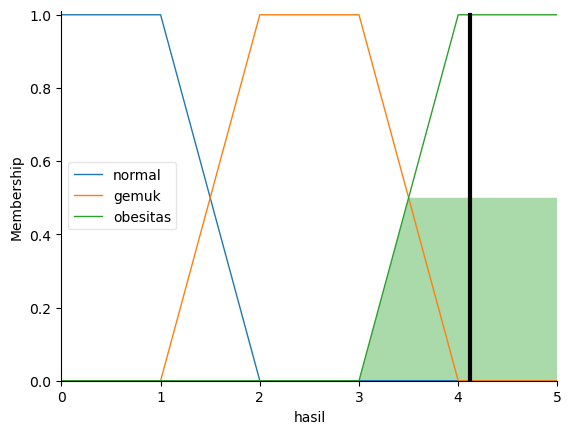

In [91]:
tinggi_inp = input("Masukkan tinggi: ")
berat_inp = input("Masukkan berat: ")

hasil_simulation.input['tinggi'] = 155
hasil_simulation.input['berat'] = 130

hasil_simulation.compute()

hasil_round = round(hasil_simulation.output['hasil'])

if hasil_round == 1:
    out = "Sangat Lemah"
elif hasil_round == 2:
    out = "Lemah"
elif hasil_round == 3:
    out = "Normal"
elif hasil_round == 4:
    out = "Kelebihan Berat"
elif hasil_round == 5:
    out = "Obesitas"

print(f"Hasil perhitungan: {out}")
hasil.view(sim=hasil_simulation)